# Comparing K-Mean, Density Based Clustering #
# Classification - Knn                                              #
#######################################################################################
##                                     Using Python 3                                      ##
############################DeepanjanMaiti#############################################

In [1]:
import numpy as np # to use number functions
import pandas as pd # to import dataset
import matplotlib.pyplot as plt # to plot
from sklearn.cluster import KMeans # to use KMeans algorithm
from sklearn.cluster import DBSCAN  # to use DBScan algorithms
from sklearn.preprocessing import StandardScaler # to normalize datasets
from mpl_toolkits.mplot3d import Axes3D # for 3D plots
from sklearn import metrics #to calculate RMSE for model evaluation
from scipy.spatial.distance import cdist #to calculate eucledian distance
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline 
# to display plots

In [2]:
corr_data=pd.read_csv("Cust_Segmentation_sample.csv") # importing data

In [3]:
corr_data.head() # checking few lines of data

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [4]:
corr_data.describe() # provides statistical analysis for each feature

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [5]:
df = corr_data.drop('Address', axis=1) # only keep numerical columns

In [6]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [7]:
X = df.values[:,1:] # getting data from 0,1 (Excluding Customer id)
X = np.nan_to_num(X) # Null to 0

In [8]:
X

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [9]:
Clus_dataSet = StandardScaler().fit_transform(X) # standarize the dataset so that all features are in normal distribution
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

##                     USING K_MEANS ALGORITHM                     ##

In [10]:
# Let us check with K value = 3
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 15) #n_init -> no o iterations defaulted to 10
k_means.fit(X)
labels = k_means.labels_ # labels would be in range (0,3) ie 0,1,2
set(labels)

{0, 1, 2}

In [11]:
df["Clus_km"] = labels #providing column header
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [12]:
df.groupby('Clus_km').mean() #Checking the distribution o K-mean points

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


In [13]:
kCC = k_means.cluster_centers_
kCC 

array([[3.29645609e+01, 1.61479199e+00, 6.37442219e+00, 3.11648690e+01,
        1.03254083e+00, 2.10413251e+00, 2.37288136e-01, 1.00947612e+01],
       [4.13333333e+01, 1.95628415e+00, 1.52568306e+01, 8.39289617e+01,
        3.10363934e+00, 5.76527869e+00, 1.36612022e-01, 1.07245902e+01],
       [4.53888889e+01, 2.66666667e+00, 1.95555556e+01, 2.27166667e+02,
        5.67844444e+00, 1.09071667e+01, 2.22222222e-01, 7.32222222e+00]])

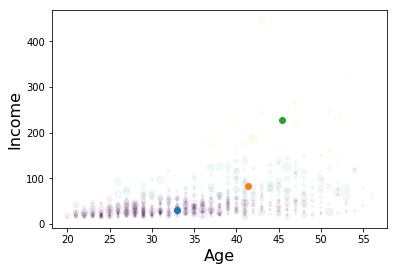

In [14]:
# Plotting in 2D using the cluster
# Features are Age and Income
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.05)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Income', fontsize=16)
i=0
for i in range(len(kCC)):
    plt.scatter(kCC[i][0], kCC[i][3],alpha=1)
plt.show()

####                     Figuring out K (Elbow Point)                     ####

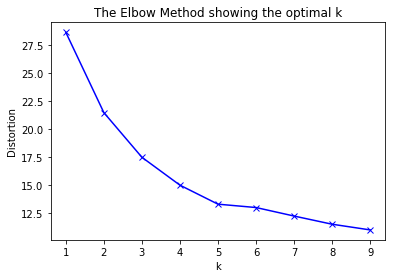

In [15]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

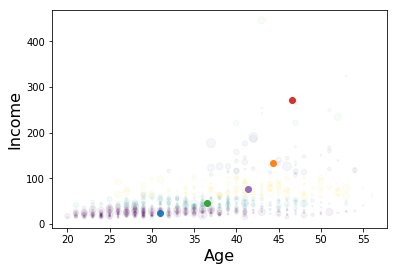

In [16]:
###### Ideal K is 5
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 15) #n_init -> no o iterations defaulted to 10
k_means.fit(X)
labels = k_means.labels_ # labels would be in range (0,5) ie 0,1,2,3,4
df["Clus_km"] = labels #providing column header
kCC = k_means.cluster_centers_
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.05)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Income', fontsize=16)
i=0
for i in range(len(kCC)):
    plt.scatter(kCC[i][0], kCC[i][3],alpha=.95)  # Plotting centroids
plt.show()

In [17]:
#What Does it say then.. who has defaulted.
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.317422,30.935561,1.613365,4.245823,24.186158,0.804344,1.636527,0.316384,10.142721
1,407.404762,44.285714,2.309524,19.571429,133.690476,4.196357,8.347976,0.133333,9.473810
2,427.228571,36.518367,1.620408,10.440816,44.828571,1.460110,3.006327,0.216080,9.959592
3,453.500000,46.600000,2.300000,21.200000,270.900000,7.884000,13.375200,0.428571,8.210000
4,404.604478,41.343284,1.947761,14.253731,76.365672,2.913903,5.301007,0.190909,11.014925


In [18]:
#Group 0 and Group 3 have more defulters
#Group 0 and 2 has more Debt Income ratio.

####                     3d plot                    ####

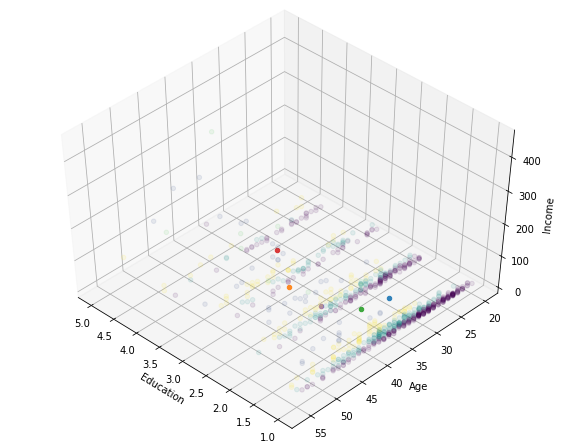

In [19]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float),alpha=.1)
i=0
for i in range(len(kCC)):
    ax.scatter(kCC[i][1],kCC[i][0], kCC[i][3],alpha=.9)


##            Density Based Clustering - DBScan         ##

In [20]:
df.head() #Chceking the data frame again

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,4
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,3


In [21]:
X = df.values[:,1:9] # getting data from 0,1 to 0,9 (Excluding Customer id and K Mean)
X = np.nan_to_num(X) # Null to 0
X

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [22]:
Clus_dataSet = StandardScaler().fit_transform(X) # standarize the dataset so that all features are in normal distribution
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [23]:
# Compute DBSCAN
epsilon = 2.1
minimumSamples = 5
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(Clus_dataSet)
labels = db.labels_
set(labels) # how many clusters and outliers. Outliers are denoted by -1

{-1, 0, 1}

In [24]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True # the ones that are part of a cluster
set(core_samples_mask) # i False found they are outlayers

{False, True}

In [25]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # no of clusters
n_clusters_

2

In [26]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters_))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

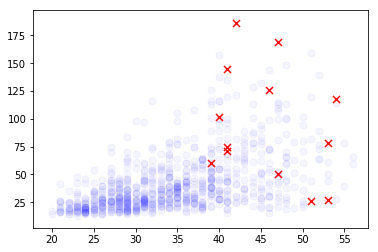

In [27]:
# Plot the points with colors
for k, col in zip(set(labels), colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 3],s=50, color='blue', marker=u'o', alpha=0.04)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 3],s=50, marker=u'x',color='red', alpha=0.95) # dark ones

In [28]:
df["Clus_db"] = labels #providing column header
df.head(10) # Providing both K_Mean and DB Scan in one segment

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km,Clus_db
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,4,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,3,-1
5,6,40,1,23,81,0.998,7.831,NaN,10.9,4,0
6,7,38,2,4,56,0.442,0.454,0.0,1.6,2,0
7,8,42,3,0,64,0.279,3.945,0.0,6.6,4,0
8,9,26,1,5,18,0.575,2.215,NaN,15.5,0,0
9,10,47,3,23,115,0.653,3.947,0.0,4.0,1,0


In [29]:
db_anomaly = df["Clus_db"] < 0
df[db_anomaly].head() # selecting the rows with anomaly

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km,Clus_db
4,5,47,1,31,253,9.308,8.908,0.0,7.2,3,-1
24,25,37,4,10,123,3.022,18.257,0.0,17.3,1,-1
43,44,37,5,9,177,0.888,9.555,0.0,5.9,1,-1
81,82,30,3,0,65,3.900,15.405,1.0,29.7,4,-1
101,102,38,4,13,126,7.613,9.649,NaN,13.7,1,-1


In [30]:
df[db_anomaly].describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km,Clus_db
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,25.000000,36.000000,36.000000,36.0
mean,442.833333,41.972222,2.611111,15.444444,147.750000,7.405944,12.798944,0.640000,18.869444,2.472222,-1.0
std,236.379779,7.832117,1.378981,9.699615,93.950861,5.079945,6.919198,0.489898,11.187259,1.362479,0.0
min,5.000000,25.000000,1.000000,0.000000,18.000000,0.821000,3.128000,0.000000,2.000000,0.000000,-1.0
25%,251.000000,37.000000,1.000000,9.000000,70.000000,3.123250,8.568250,0.000000,7.800000,1.000000,-1.0
50%,480.000000,42.500000,3.000000,13.000000,127.500000,7.027500,11.869500,1.000000,16.650000,3.000000,-1.0
75%,597.000000,47.250000,4.000000,24.250000,220.250000,9.947000,16.797250,1.000000,28.575000,4.000000,-1.0
max,848.000000,54.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000,4.000000,-1.0


##        Comparing the DB Scan and K- Mean Sets     ##

In [31]:
CompareKMean_DB_Values = df.values[:,(-2,-1)]
CompareKMean_DB_Values

array([[ 0.,  0.],
       [ 4.,  0.],
       [ 2.,  1.],
       ...,
       [ 0., -1.],
       [ 0.,  0.],
       [ 4.,  0.]])

In [32]:
a = np.array(CompareKMean_DB_Values)
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{-1.0: 36, 0.0: 1066, 1.0: 209, 2.0: 245, 3.0: 10, 4.0: 134}

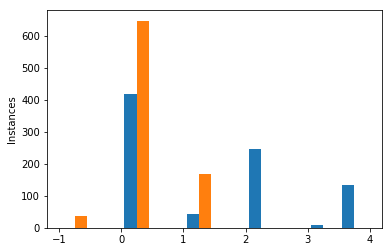

In [33]:
#Check the histogram of distrubtion
plt.hist(CompareKMean_DB_Values)
plt.ylabel('Instances');
plt.show()  

##                 K Nearest Neighbour                ##

In [34]:
df.head() #Chceking the data frame again

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km,Clus_db
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,4,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,3,-1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EBB4BE668>]],
      dtype=object)

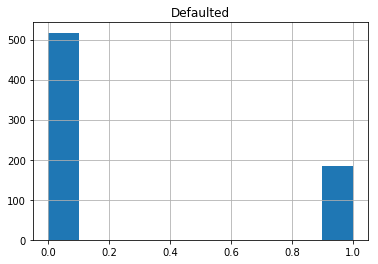

In [35]:
df.hist(column='Defaulted', bins=10)

Text(0, 0.5, 'DebtIncomeRatio')

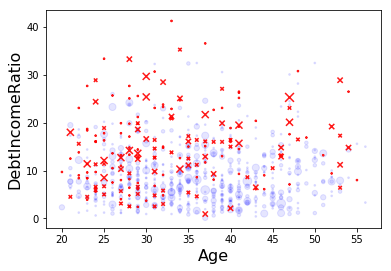

In [36]:
Defaulted = df["Defaulted"] == 1
NotDefaulted = df["Defaulted"] != 1 

ND = df[NotDefaulted].values[:,1:9]
ND = np.nan_to_num(ND) # Null to 0
D = df[Defaulted].values[:,1:9]
D = np.nan_to_num(D) # Null to 0
area = np.pi * ( ND[:, 1])**2  
plt.scatter(ND[:, 0], ND[:, 7], s=area,color='blue', marker='o',alpha=0.1)
plt.scatter(D[:, 0], D[:, 7], s=area, color='red',marker=u'x',alpha=0.9)
plt.xlabel('Age', fontsize=16)
plt.ylabel('DebtIncomeRatio', fontsize=16)

####  Will use the Defaulted column as the dependent feature and the columns Age till Other Debt as independent features (x)

In [37]:
X = df.values[:,1:7] # getting data from 0,1 to 0,9 (Excluding Customer id and K Mean)
X = np.nan_to_num(X) # Null to 0
X

array([[ 41.   ,   2.   ,   6.   ,  19.   ,   0.124,   1.073],
       [ 47.   ,   1.   ,  26.   , 100.   ,   4.582,   8.218],
       [ 33.   ,   2.   ,  10.   ,  57.   ,   6.111,   5.802],
       ...,
       [ 25.   ,   4.   ,   0.   ,  18.   ,   2.802,   3.21 ],
       [ 32.   ,   1.   ,  12.   ,  28.   ,   0.116,   0.696],
       [ 52.   ,   1.   ,  16.   ,  64.   ,   1.866,   3.638]])

In [38]:
y = df['Defaulted'].values
y = np.nan_to_num(y) # Null to 0
y[0:10]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
X[0:5]

array([[4.100e+01, 2.000e+00, 6.000e+00, 1.900e+01, 1.240e-01, 1.073e+00],
       [4.700e+01, 1.000e+00, 2.600e+01, 1.000e+02, 4.582e+00, 8.218e+00],
       [3.300e+01, 2.000e+00, 1.000e+01, 5.700e+01, 6.111e+00, 5.802e+00],
       [2.900e+01, 2.000e+00, 4.000e+00, 1.900e+01, 6.810e-01, 5.160e-01],
       [4.700e+01, 1.000e+00, 3.100e+01, 2.530e+02, 9.308e+00, 8.908e+00]])

In [40]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323,
        -0.75446707],
       [ 1.48949049, -0.76634938,  3.31184882,  5.35624866,  3.63890032,
         1.71609424]])

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape)
print ('Test set:', X_test.shape)

Train set: (680, 6)
Test set: (170, 6)


In [42]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [43]:
yhat = neigh.predict(X_test)
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8382352941176471
Test set Accuracy:  0.8352941176470589


In [45]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.8       , 0.83529412, 0.81764706, 0.83529412, 0.83529412,
       0.82941176, 0.83529412, 0.83529412, 0.82941176])

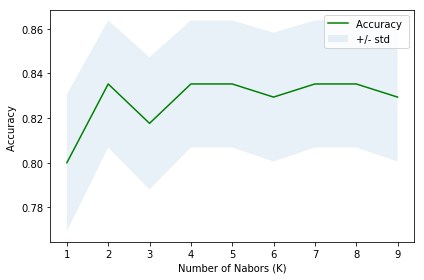

In [50]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [46]:
k = 2
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8470588235294118
Test set Accuracy:  0.8352941176470589
